# データ読み込み

- ファイルの確認
- ライブラリの読み込み
- データの読み込み
- 構造の把握
- 長さの把握
- 欠損の確認

In [1]:
!ls

beginner2.ipynb  sub1.csv  sub5.csv	      train.csv
beginner3.ipynb  sub2.csv  submit.csv	      重回帰分析template.ipynb
beginner.ipynb	 sub3.csv  submit_sample.csv
lightgbm.ipynb	 sub4.csv  test.csv


In [2]:
# データ操作系
import pandas as pd
import numpy as np
import collections
# グラフ描画系
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# 前処理
import sklearn.preprocessing as sp
# データ分割
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
# 機械学習モデル
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.svm import LinearSVC # SVM
import lightgbm as lgb #LightGBM
# チューニング
from sklearn import metrics
import optuna
# 制御系
import warnings
warnings.simplefilter('ignore')
import gc


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv")

In [4]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [5]:
sample.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
print(len(train))
print(len(test))
print(len(sample))

27100
18050
18049


In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# データの結合

- 同時に処理するため一時的にtrainとtestを結合する
- 長さの検算
- 欠損の検算

In [9]:
data = pd.concat([train, test], sort=False)

In [10]:
print(len(train), len(test), len(data))

27100 18050 45150


In [11]:
data.isnull().sum()

id               0
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y            18050
dtype: int64

# 特徴量エンジニアリング

In [12]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [13]:
train.describe(include= 'O' )

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27100,27100,27100,27100,27100,27100,27100,27100,27100
unique,11,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5957,17565,15955,27090,15819,23651,19147,11232,23099


## age

## balance

## day

## duration

## campaign

## pdays

## previous

## job

## material

## education

## default

## housing

## loan

## contact

## month

## poutcome

## カテゴリー変数

In [14]:
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
for i in categorical_features:
    label_encoder = sp.LabelEncoder()
    label_encoder.fit(data[i])
    label_encoder.transform(data[i])
    data[i]=label_encoder.transform(data[i])

## 整形完了後

In [15]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0.0
1,1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1.0
2,2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0.0
3,3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0.0
4,4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0.0


# 相関の確認

In [16]:
data.corr()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,1.000000,0.006042,0.006986,-0.008836,-0.004599,0.008952,0.001891,0.003951,0.010476,-0.011158,-0.001089,-0.002621,-0.004184,-0.002797,0.000338,-0.004696,-0.007088,0.002318
age,0.006042,1.000000,0.048086,-0.209372,-0.053898,-0.003564,0.000678,-0.285335,-0.044623,-0.054893,-0.064515,-0.129942,-0.057669,0.033344,0.004698,0.037856,-0.002386,0.086668
job,0.006986,0.048086,1.000000,0.028342,0.171798,0.001599,0.006206,-0.066930,0.012703,-0.046596,0.018764,-0.041526,-0.009833,-0.008934,-0.005991,0.002402,-0.018052,-0.000511
marital,-0.008836,-0.209372,0.028342,1.000000,0.168923,-0.007550,-0.001651,-0.036154,-0.014937,-0.021453,-0.006567,-0.022269,-0.026807,-0.037668,-0.001891,0.030155,-0.050204,0.081587
education,-0.004599,-0.053898,0.171798,0.168923,1.000000,-0.005068,0.001845,-0.082079,-0.055173,-0.069556,0.000948,-0.043812,-0.023502,-0.011010,0.001931,0.028109,-0.045916,0.075080
default,0.008952,-0.003564,0.001599,-0.007550,-0.005068,1.000000,0.001155,-0.002895,0.004562,-0.003940,-0.009330,-0.003705,-0.004591,-0.010390,0.003120,-0.004179,0.005681,-0.005586
balance,0.001891,0.000678,0.006206,-0.001651,0.001845,0.001155,1.000000,0.005037,-0.008646,0.000181,0.001772,0.004438,0.000807,-0.004737,-0.001370,0.005881,-0.009723,-0.000899
housing,0.003951,-0.285335,-0.066930,-0.036154,-0.082079,-0.002895,0.005037,1.000000,0.009817,0.118939,0.131649,0.320652,0.183220,-0.103906,0.003761,-0.040770,-0.047447,-0.164710
loan,0.010476,-0.044623,0.012703,-0.014937,-0.055173,0.004562,-0.008646,0.009817,1.000000,0.039239,-0.094751,-0.043638,-0.068805,0.103973,-0.005237,-0.051736,0.065985,-0.062696
contact,-0.011158,-0.054893,-0.046596,-0.021453,-0.069556,-0.003940,0.000181,0.118939,0.039239,1.000000,-0.094050,0.278705,0.034556,-0.051145,0.001320,-0.124929,0.208653,-0.083513


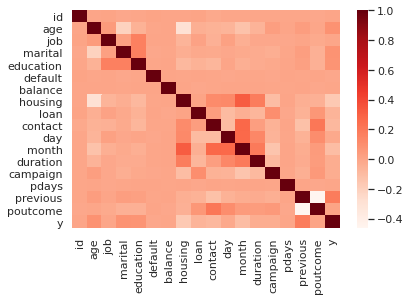

In [17]:
sns.heatmap(data.corr(),cmap="Reds")

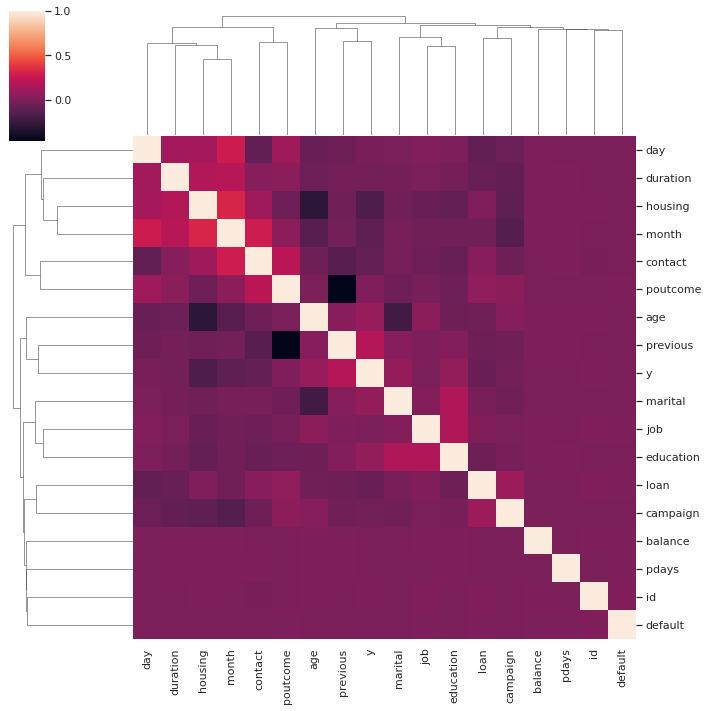

In [18]:
sns.clustermap(data.corr())

# 採用するカラムの決定

In [19]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
adopt_columns = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y']
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
adopt_data = data[adopt_columns]
adopt_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0.0
1,1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1.0
2,2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0.0
3,3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0.0
4,4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0.0


In [21]:
# 標準化？
#scale = sp.StandardScaler()
#scale.fit(adopt_data)

#X_train = scale.transform(adopt_data)

## データをtrainとtestに戻す

In [22]:
train = adopt_data[:len(train)]
test = adopt_data[len(train):]

## データを分割する

In [23]:
y_train = train['y']
X_train = train.drop('y', axis=1)
X_test = test.drop('y', axis=1)

### LightGBT

In [24]:
def get_evaluate(y_test, predict):

    fpr, tpr, thr_arr = metrics.roc_curve(y_test, predict)

    accuracy = metrics.auc(fpr, tpr)
    #recall = metrics.recall_score(y_test, predict)      

    return accuracy

In [32]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

auc_list = []
best_parameters = []

for train_index, test_index in cv.split(X_train, y_train):
    X_tr = X_train.iloc[train_index]
    y_tr = y_train.iloc[train_index]
    X_te = X_train.iloc[test_index]
    y_te = y_train.iloc[test_index]
    
    X_t, X_va, y_t, y_va = train_test_split(X_te, y_te, random_state=90, 
                                                        shuffle=True, stratify=y_te, test_size=0.3)
    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features,free_raw_data=False)
    lgb_valid = lgb.Dataset(X_va, y_va, reference=lgb_train)
    
    
    params = {
        'objective': 'mean_squared_error',
        'metric': 'rmse'
    }
    

    clf = optuna.integration.lightgbm.train(
        params, 
        lgb_train, 
        valid_sets=lgb_valid,
        verbose_eval=False,
        num_boost_round=100,
        early_stopping_rounds=5
    )

    y_predict = clf.predict(X_t, num_iteration=clf.best_iteration)
    auc= get_evaluate(y_t, y_predict)
    print('AUC:{}'.format(auc))

    auc_list.append(auc)
    best_parameters.append(clf.params)
print('Kfold平均 AUC:{}'.format(np.mean(auc_list)))




  0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.243703:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.243703:  14%|#4        | 1/7 [00:00<00:02,  2.43it/s][I 2020-08-08 20:40:35,857] Trial 0 finished with value: 0.2437031239355452 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.2437031239355452.



feature_fraction, val_score: 0.243703:  14%|#4        | 1/7 [00:00<00:02,  2.43it/s]


feature_fraction, val_score: 0.243703:  14%|#4        | 1/7 [00:00<00:02,  2.43it/s]


feature_fraction, val_score: 0.243703:  29%|##8       | 2/7 [00:00<00:02,  2.37it/s][I 2020-08-08 20:40:36,305] Trial 1 finished with value: 0.24413783235389794 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.2437031239355452.



feature_fraction, val_score: 0.243703:  29%|##8       | 2/7 [00:00<00:02,  2.37it/s]


feature_fraction, val_score: 0.243

feature_fraction_stage2, val_score: 0.242412:  17%|#6        | 1/6 [00:00<00:01,  2.85it/s][I 2020-08-08 20:40:56,497] Trial 37 finished with value: 0.24241170557139935 and parameters: {'feature_fraction': 0.8160000000000001}. Best is trial 37 with value: 0.24241170557139935.



feature_fraction_stage2, val_score: 0.242412:  17%|#6        | 1/6 [00:00<00:01,  2.85it/s]


feature_fraction_stage2, val_score: 0.242412:  17%|#6        | 1/6 [00:00<00:01,  2.85it/s]


feature_fraction_stage2, val_score: 0.242412:  33%|###3      | 2/6 [00:00<00:01,  2.54it/s][I 2020-08-08 20:40:57,004] Trial 38 finished with value: 0.2440990072728939 and parameters: {'feature_fraction': 0.7200000000000001}. Best is trial 37 with value: 0.24241170557139935.



feature_fraction_stage2, val_score: 0.242412:  33%|###3      | 2/6 [00:00<00:01,  2.54it/s]


feature_fraction_stage2, val_score: 0.242412:  33%|###3      | 2/6 [00:01<00:01,  2.54it/s]


feature_fraction_stage2, val_score: 0.242412:  50%|#####     | 3/

AUC:0.8491135234044658





  0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.243106:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.243106:  14%|#4        | 1/7 [00:00<00:01,  3.64it/s][I 2020-08-08 20:41:10,898] Trial 0 finished with value: 0.2431060586239745 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.2431060586239745.



feature_fraction, val_score: 0.243106:  14%|#4        | 1/7 [00:00<00:01,  3.64it/s]


feature_fraction, val_score: 0.242352:  14%|#4        | 1/7 [00:00<00:01,  3.64it/s]


feature_fraction, val_score: 0.242352:  29%|##8       | 2/7 [00:00<00:01,  2.87it/s][I 2020-08-08 20:41:11,425] Trial 1 finished with value: 0.2423520130256817 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.2423520130256817.



feature_fraction, val_score: 0.242352:  29%|##8       | 2/7 [00:00<00:01,  2.87it/s]


feature_fraction, val_score: 0.2423

feature_fraction_stage2, val_score: 0.241550:  17%|#6        | 1/6 [00:00<00:03,  1.45it/s][I 2020-08-08 20:41:31,694] Trial 37 finished with value: 0.24232359634486944 and parameters: {'feature_fraction': 0.9159999999999999}. Best is trial 37 with value: 0.24232359634486944.



feature_fraction_stage2, val_score: 0.241550:  17%|#6        | 1/6 [00:00<00:03,  1.45it/s]


feature_fraction_stage2, val_score: 0.241550:  17%|#6        | 1/6 [00:01<00:03,  1.45it/s]


feature_fraction_stage2, val_score: 0.241550:  33%|###3      | 2/6 [00:01<00:02,  1.54it/s][I 2020-08-08 20:41:32,397] Trial 38 finished with value: 0.24154974071167673 and parameters: {'feature_fraction': 0.8839999999999999}. Best is trial 38 with value: 0.24154974071167673.



feature_fraction_stage2, val_score: 0.241550:  33%|###3      | 2/6 [00:01<00:02,  1.54it/s]


feature_fraction_stage2, val_score: 0.241550:  33%|###3      | 2/6 [00:01<00:02,  1.54it/s]


feature_fraction_stage2, val_score: 0.241550:  50%|#####     | 3

AUC:0.853716834400732





  0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.236832:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.236832:  14%|#4        | 1/7 [00:00<00:03,  1.56it/s][I 2020-08-08 20:41:50,768] Trial 0 finished with value: 0.2368321289445811 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.2368321289445811.



feature_fraction, val_score: 0.236832:  14%|#4        | 1/7 [00:00<00:03,  1.56it/s]


feature_fraction, val_score: 0.236832:  14%|#4        | 1/7 [00:01<00:03,  1.56it/s]


feature_fraction, val_score: 0.236832:  29%|##8       | 2/7 [00:01<00:02,  1.69it/s][I 2020-08-08 20:41:51,243] Trial 1 finished with value: 0.2376412219966852 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.2368321289445811.



feature_fraction, val_score: 0.236832:  29%|##8       | 2/7 [00:01<00:02,  1.69it/s]


feature_fraction, val_score: 0.2356

feature_fraction_stage2, val_score: 0.235348:  33%|###3      | 1/3 [00:00<00:00,  2.26it/s][I 2020-08-08 20:42:08,695] Trial 37 finished with value: 0.23645385912482114 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.23645385912482114.



feature_fraction_stage2, val_score: 0.235348:  33%|###3      | 1/3 [00:00<00:00,  2.26it/s]


feature_fraction_stage2, val_score: 0.235348:  33%|###3      | 1/3 [00:00<00:00,  2.26it/s]


feature_fraction_stage2, val_score: 0.235348:  67%|######6   | 2/3 [00:00<00:00,  2.28it/s][I 2020-08-08 20:42:09,127] Trial 38 finished with value: 0.23645385912482114 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.23645385912482114.



feature_fraction_stage2, val_score: 0.235348:  67%|######6   | 2/3 [00:01<00:00,  2.28it/s]


feature_fraction_stage2, val_score: 0.235348:  67%|######6   | 2/3 [00:01<00:00,  2.28it/s]


feature_fraction_stage2, val_score: 0.235348: 100%|##########| 3/3 [00:01<00:0

AUC:0.8380273113919041





  0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.241528:   0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: 0.241528:  14%|#4        | 1/7 [00:00<00:01,  3.81it/s][I 2020-08-08 20:42:20,764] Trial 0 finished with value: 0.24152797747916793 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.24152797747916793.



feature_fraction, val_score: 0.241528:  14%|#4        | 1/7 [00:00<00:01,  3.81it/s]


feature_fraction, val_score: 0.240355:  14%|#4        | 1/7 [00:00<00:01,  3.81it/s]


feature_fraction, val_score: 0.240355:  29%|##8       | 2/7 [00:00<00:01,  3.25it/s][I 2020-08-08 20:42:21,173] Trial 1 finished with value: 0.24035480412924987 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.24035480412924987.



feature_fraction, val_score: 0.240355:  29%|##8       | 2/7 [00:00<00:01,  3.25it/s]


feature_fraction, val_score: 0.

feature_fraction_stage2, val_score: 0.239265:  33%|###3      | 1/3 [00:01<00:02,  1.13s/it][I 2020-08-08 20:42:44,387] Trial 37 finished with value: 0.2392735335639738 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.2392735335639738.



feature_fraction_stage2, val_score: 0.239265:  33%|###3      | 1/3 [00:01<00:02,  1.13s/it]


feature_fraction_stage2, val_score: 0.239265:  33%|###3      | 1/3 [00:02<00:02,  1.13s/it]


feature_fraction_stage2, val_score: 0.239265:  67%|######6   | 2/3 [00:02<00:01,  1.21s/it][I 2020-08-08 20:42:45,758] Trial 38 finished with value: 0.2392735335639738 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.2392735335639738.



feature_fraction_stage2, val_score: 0.239265:  67%|######6   | 2/3 [00:02<00:01,  1.21s/it]


feature_fraction_stage2, val_score: 0.239265:  67%|######6   | 2/3 [00:03<00:01,  1.21s/it]


feature_fraction_stage2, val_score: 0.239265: 100%|##########| 3/3 [00:03<00:00,  

AUC:0.8026909571969041
Kfold平均 AUC:0.8358871565985015


In [34]:
auc_list

[0.8491135234044658, 0.853716834400732, 0.8380273113919041, 0.8026909571969041]

In [35]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary'
}

clf = lgb.train(best_parameters[1], lgb_train)

In [36]:
y_predict = clf.predict(X_test, num_iteration=clf.best_iteration)

In [37]:
light_pred = y_predict

# 提出準備

In [38]:
test["y"] = light_pred

In [39]:
test["y"].value_counts()

-0.000831    67
 0.001289    64
 0.001721    63
-0.001198    24
-0.001229    24
             ..
 0.301222     1
 0.015328     1
 0.081633     1
-0.025468     1
 0.102743     1
Name: y, Length: 17040, dtype: int64

In [40]:
test["y"].to_csv("sub5.csv", index=True, header=False)

In [41]:
!ls

beginner2.ipynb  sub1.csv  sub5.csv	      train.csv
beginner3.ipynb  sub2.csv  submit.csv	      重回帰分析template.ipynb
beginner.ipynb	 sub3.csv  submit_sample.csv
lightgbm.ipynb	 sub4.csv  test.csv


In [42]:
!cat sub5.csv

0,0.731868715063611
1,0.0927240020567079
2,0.04410381177282332
3,0.007078334075343959
4,0.049807817848944405
5,-0.002744695211018988
6,0.012330895768184408
7,0.1650540742211601
8,0.026837766318010332
9,0.013184964050939673
10,-0.0008311948938254034
11,0.11937722012464731
12,-0.007219655776654781
13,0.0787953608706739
14,0.06530473435699079
15,0.020203033936356203
16,0.08920163022045921
17,0.007937728273763756
18,0.06954017823357976
19,0.07497429846198843
20,0.12960742857110188
21,0.09150175026033294
22,0.007348611965154622
23,-0.0005213882577986039
24,0.1649923770628856
25,0.5464834862912685
26,0.08877734610916403
27,0.00104938984186721
28,0.016883196042947544
29,0.002480585394427991
30,0.0026378617558247904
31,0.0041792901975649145
32,0.01410492391407358
33,0.018710427715685516
34,0.2222779755189763
35,0.10394003902951911
36,0.09393535274707387
37,0.03148998828742703
38,0.09957093946978547
39,0.10868340490332672
40,0.020868538775410013
41,0.08034210687860413
42,0.024377435437203013
43

4918,-0.0019352130288133973
4919,0.001553136037217683
4920,0.001179832429848472
4921,0.2582970045281896
4922,0.0678798276338907
4923,0.2823925953633502
4924,0.11585767498432763
4925,-0.005682589043669035
4926,-0.005738221798203392
4927,-0.013824821346682486
4928,0.008338916501891877
4929,-0.00844111468434662
4930,0.05312035979848894
4931,-0.005062499265268249
4932,-0.004219420421682458
4933,0.02470305820586228
4934,0.038107961684287414
4935,0.05067789717290448
4936,-0.0008727916982676868
4937,0.0074973963271106935
4938,0.016161060617862374
4939,0.0803585196656766
4940,0.005001419853115847
4941,0.07974901836509171
4942,0.02087539623296515
4943,0.03201435201011816
4944,0.02296501314528977
4945,0.09181111553450581
4946,0.14345112245113098
4947,0.011585242208019136
4948,0.18829964802342114
4949,0.0865992307320855
4950,0.021268064760794365
4951,0.5448329599460618
4952,0.09424814921685132
4953,-0.03918959754137314
4954,0.028855488461268
4955,0.1278010653248524
4956,0.03389592781211431
4957,0

9011,0.013818403868772708
9012,0.11096263645290595
9013,0.008700710233227658
9014,-0.014497228181538549
9015,0.02807868200227653
9016,0.04678862881968649
9017,0.18668568527338839
9018,0.11237139144599569
9019,0.003980271133781298
9020,0.014939728666584438
9021,0.033509120345116924
9022,-0.0017714439491868523
9023,0.19848113770510287
9024,-0.0046194418693357
9025,0.18486726269399698
9026,-0.003908110179086632
9027,0.06434227637380413
9028,0.027858993761732346
9029,0.0033113681494570594
9030,0.2914133756505818
9031,0.0023760228451904938
9032,-0.01044079054117065
9033,-0.018978488046757343
9034,-0.0027033584790468086
9035,0.04359150811343861
9036,0.12513638948808367
9037,0.01933882392692649
9038,0.03836467581539284
9039,0.17120884227913155
9040,0.002455461308670803
9041,0.01856655782077081
9042,-0.020972192210458946
9043,0.034098382901301544
9044,0.013882962814894628
9045,0.018392392409223263
9046,0.23506112988654176
9047,0.18093264427568387
9048,0.02226551234181172
9049,0.152145054912224

11223,0.07067135719038914
11224,0.012070557479769567
11225,0.005503596563134918
11226,-0.000353007937470332
11227,0.004869595725355971
11228,-0.0009613259359689286
11229,0.001184841921226251
11230,0.02348027191002335
11231,0.14011233923228764
11232,0.029328709917906825
11233,0.05027341517950028
11234,0.010022033344847458
11235,0.29393761258852014
11236,0.012152129833486243
11237,0.062043249317246606
11238,0.17575266221191474
11239,0.0017211704891837982
11240,0.16844407500765132
11241,0.031207753919301223
11242,-0.005429994425241607
11243,0.06232273373621384
11244,0.024826815410136104
11245,0.001251854467871091
11246,0.03649974565633095
11247,0.028940909952188152
11248,-0.0011058059252347652
11249,0.04429998078671028
11250,0.16245368130046575
11251,0.0027083713239526032
11252,0.0858621882177551
11253,0.017035526081395323
11254,0.1436959879867077
11255,0.3115698820083771
11256,0.2784356582523035
11257,0.0009738102675739616
11258,0.1326446231799014
11259,0.009002218757265704
11260,0.01424

13983,0.03106677802492915
13984,-0.002859691489032728
13985,0.05136107301146685
13986,0.06438309706190372
13987,0.023778048934712935
13988,0.022667694278953158
13989,0.2543220532712283
13990,0.0214166882389025
13991,-0.009807377757511301
13992,0.009967598842976197
13993,0.01986206748446467
13994,0.42963293670523156
13995,0.11033961079496585
13996,0.29808880322637854
13997,0.059569433104502884
13998,0.0012894463318559451
13999,0.02616279317124286
14000,0.0025412434233107696
14001,0.03535506268397229
14002,0.017704829131094946
14003,-0.004790894182670853
14004,0.0047980040403454395
14005,0.026502525963666732
14006,0.036915128822703744
14007,-0.0026313364410241887
14008,0.22207445402249323
14009,0.13026997418729686
14010,-0.0003147787651759538
14011,0.14796465228339015
14012,0.001184841921226251
14013,0.0060716867364975086
14014,0.06130690711348802
14015,0.2608151313160098
14016,-0.0013657930892541337
14017,0.032185716498370855
14018,0.06189111986514142
14019,0.11121993731217283
14020,0.0

16488,0.9018430872363218
16489,-0.0027702259907885097
16490,0.00794089941633168
16491,0.016301806658952225
16492,0.5346587992112184
16493,0.1305608421135393
16494,0.08524909410636977
16495,0.8593585357059946
16496,0.06450905759667219
16497,0.2151397754579461
16498,-0.003596372655049018
16499,0.04198474309689264
16500,0.04554536628998124
16501,0.0015571532062038538
16502,0.03569535924470023
16503,0.0840521555981513
16504,0.10855024248782186
16505,-0.037558031838906096
16506,-0.008004744006186339
16507,0.1565401279799387
16508,0.5256442739519468
16509,0.05206102327706577
16510,0.03389877164952166
16511,0.1780869822146732
16512,0.07968598845145664
16513,0.006056096568582946
16514,0.07447711485809627
16515,0.0017211704891837982
16516,0.05387189299706087
16517,0.060383992399531995
16518,0.08166340566874623
16519,0.23257539611915506
16520,0.12676439193135544
16521,0.21929443020150066
16522,0.11340536526954285
16523,0.0005875253379565577
16524,0.04475563900059903
16525,0.002200803843405056
16